# Andiamo a caricare il file con la resa

In [96]:
import rasterio
from matplotlib import pyplot as plt
import pickle
import numpy as np
from tsmoothie.smoother import LowessSmoother
import cv2
from mpl_toolkits.mplot3d import axes3d
from datetime import datetime
import skfda
from skfda.representation.interpolation import SplineInterpolation

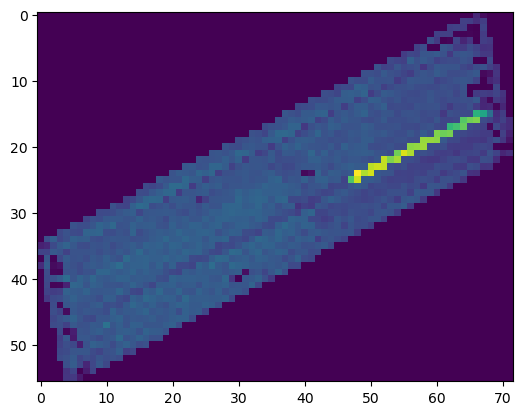

In [97]:
resa = rasterio.open(r'OUTPUT.tif')
plt.imshow(resa.read(1))

In [98]:
with open('hdvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)

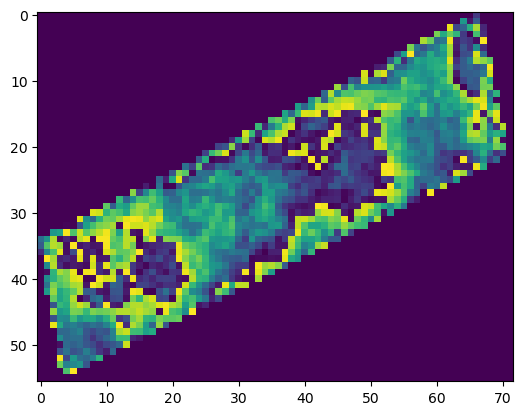

In [99]:
resa = rasterio.open(r'campo3.tiff')
plt.imshow(resa.read(1))

# Procediamo ad aggiungere i valori della resa all'immagine

(57, 12, 56, 72)


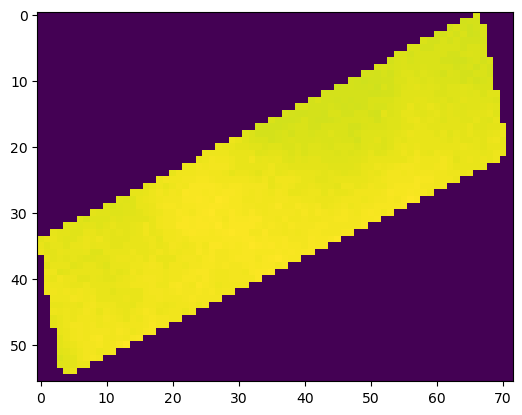

In [100]:
with open('campo3_bande.pickle', 'rb') as handle:
    campo3 = pickle.load(handle)
print(campo3.shape)
plt.imshow(campo3[4][2])

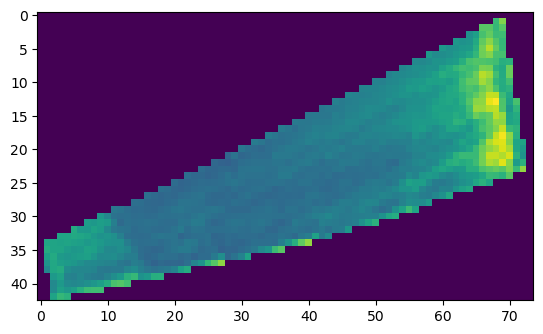

In [101]:
with open('campo4_bande.pickle', 'rb') as handle:
    campo4 = pickle.load(handle)
plt.imshow(campo4[30][2])

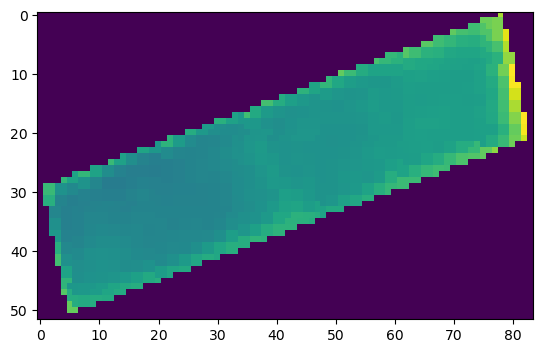

In [102]:
with open('campo6_bande.pickle', 'rb') as handle:
    campo6 = pickle.load(handle)
plt.imshow(campo6[40][10])

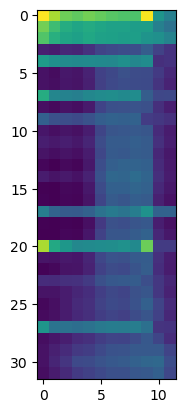

In [103]:
newImage3 = []
for x in range(0, campo3.shape[2]):
    for y in range(0,campo3.shape[3]):
        if(np.sum(campo3[:,:,x,y] != 0)):
            newImage3.append(campo3[18:50,:,x,y]/10000) # Abbiamo preso l'intervallo consigliato dal professore

plt.imshow(newImage3[10])

# Andiamo a eseguire un' operazione di smoothing

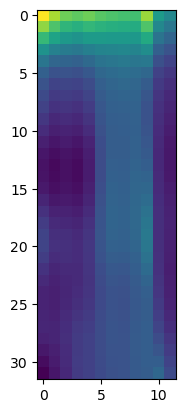

In [109]:
imageSmooth = newImage3

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)

for x in range(len(newImage3)):
    for banda in range(0,campo3.shape[1]):
        imageSmooth[x][:,banda] = smoother.smooth(newImage3[x][:,banda]).smooth_data[0]

plt.imshow(imageSmooth[10])


(1579, 32, 12)


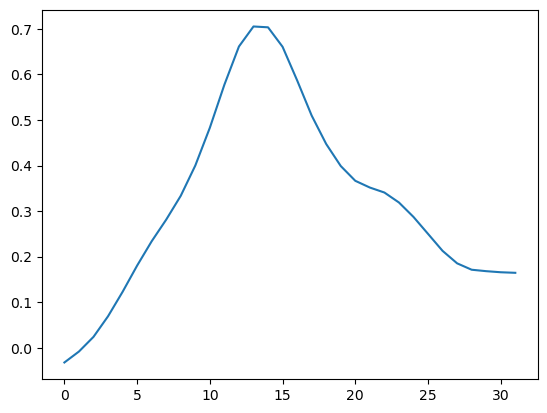

In [135]:
print(np.array(imageSmooth).shape)
plt.plot((imageSmooth[10][:,7]-imageSmooth[10][:,3])/(imageSmooth[10][:,7]+imageSmooth[10][:,3]))

# Interpolazione

In [118]:
date = ['2016-11-05', '2016-11-12', '2016-11-15', '2016-11-22', '2016-11-25', '2016-12-02', '2016-12-05', '2016-12-12', '2016-12-15', '2016-12-22', '2016-12-25', '2017-01-01', '2017-01-04', '2017-01-14', '2017-01-24', '2017-01-31', '2017-02-03', '2017-02-10', '2017-02-13', '2017-02-20', '2017-02-23', '2017-03-02', '2017-03-05', '2017-03-12', '2017-03-15', '2017-03-22', '2017-03-25', '2017-04-01', '2017-04-04', '2017-04-11', '2017-04-14', '2017-04-21', '2017-04-24', '2017-05-01', '2017-05-04', '2017-05-11', '2017-05-14', '2017-05-21', '2017-05-24', '2017-05-31', '2017-06-03', '2017-06-10', '2017-06-13', '2017-06-20', '2017-06-23', '2017-06-30', '2017-07-03', '2017-07-08', '2017-07-10', '2017-07-13', '2017-07-15', '2017-07-18', '2017-07-20', '2017-07-23', '2017-07-25', '2017-07-28', '2017-07-30']
days = []
zeroDay = datetime.strptime("2017-01-01","%Y-%m-%d")
date_cut = date[18:50]
for a in date_cut:
    days.append((datetime.strptime(a,"%Y-%m-%d")-zeroDay).days)

print(days)

grid_points = days  # Grid points of the curves

inter = skfda.FDataGrid(
    data_matrix=np.transpose(imageSmooth), #imageSmooth[0]
    grid_points=grid_points,
)
 
#inter.plot()

[43, 50, 53, 60, 63, 70, 73, 80, 83, 90, 93, 100, 103, 110, 113, 120, 123, 130, 133, 140, 143, 150, 153, 160, 163, 170, 173, 180, 183, 188, 190, 193]


In [119]:
inter.interpolation = SplineInterpolation(
    interpolation_order= 3
)
#inter.plot()

(12, 30, 1579)


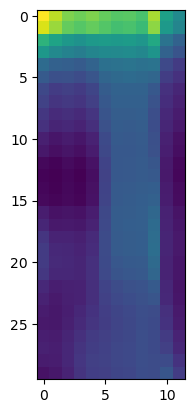

In [137]:
test = inter.interpolation._evaluate(inter,range(43,193,5))
#newInter = inter.interpolation._evaluate(inter,range(43,193,5))[:,:,0]
print(test.shape)
plt.imshow(np.transpose(test[:,:,500]))